Purchase Product Prediction(3P)

Project Background - Proyek ini dilatarbelakangi untuk membuat model yang mampu memprediksi penjualan berbagai produk perusahaan, hal ini berguna untuk perusahaan ketika ingin memenuhi target dan kepuasan pelanggan karena dengan prediksi penjualan dapat membantu perusahaan untuk meramalkan permintaan, mengidentifikasi awal biaya simpan/inventori. Proyek ini juga bertujuan untuk meningkatkan efisiensi dan efektivitas operasional perusahaan, serta memberikan wawasan dan rekomendasi untuk meningkatkan strategi pemasaran dan penjualan.

Goals -  Dengan menggunakan data historis penjualan, variabel eksternal, dan teknik pembelajaran mesin, model pembelajaran mesin  diharapkan dapat memberikan prediksi yang akurat  untuk prediksi penjualan berbagai produk perusahaan.

Import Library

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import datetime as dt
from datetime import date
from datetime import datetime as dt

Load Dataset

In [100]:
df= pd.read_csv("train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [102]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [103]:
df["Product_Category_2"].fillna(0, inplace=True)
df["Product_Category_3"].fillna(0, inplace=True)

In [104]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

EDA

Text(0.5, 1.0, 'Distribusi Usia')

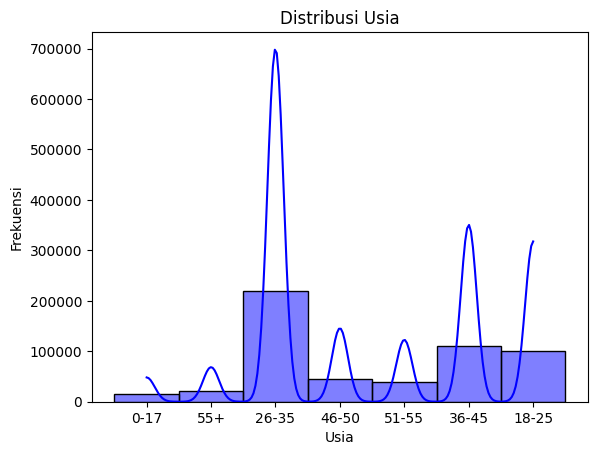

In [7]:
sns.histplot(data=df["Age"], kde=True, color='blue')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia')

Dari distribusi usia tersebut dapat diketahui bahwa pembeli kebanyakan berusia antara 26-35 tahun

([<matplotlib.patches.Wedge at 0x1f094caaa10>,
 [Text(-0.785367774085001, 0.7701931312526561, 'Male'),
  Text(0.7853677019743126, -0.7701932047840901, 'Female')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.3%'),
  Text(0.42838238289507957, -0.42010538442768547, '24.7%')])

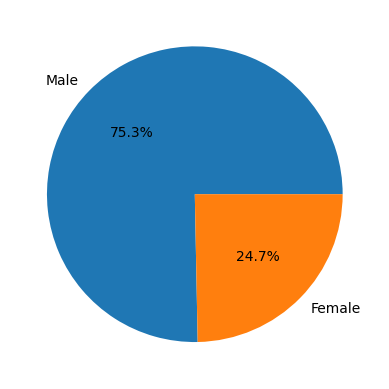

In [8]:
dfpie = df["Gender"].value_counts()
plt.pie(dfpie, labels =["Male", "Female"], autopct="%1.1f%%")

Pelanggan juga didominasi oleh laki-laki sebesar 75.3%

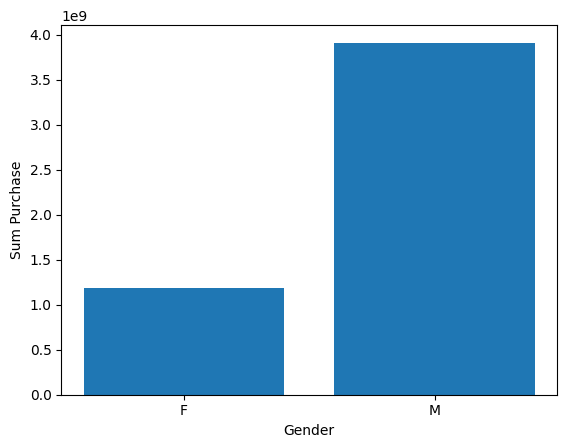

In [9]:
df1 = df.groupby("Gender")["Purchase"].sum().reset_index()
plt.bar(data = df1, x="Gender", height="Purchase")
plt.xlabel("Gender")
plt.ylabel("Sum Purchase")
plt.show()

berdasarkan total penjualan, laki-laki juga sangat mendominasi, artinya banyak pembelian dilakukan oleh laki-laki dibandingkan dengan perempuan

<AxesSubplot: xlabel='Gender', ylabel='Purchase'>

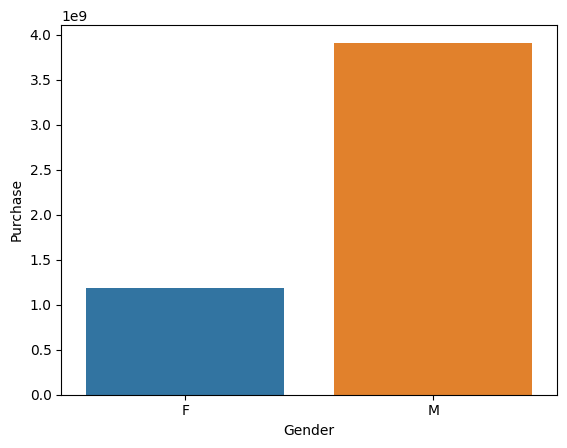

In [10]:
sns.barplot(x='Gender', y='Purchase', data=df1)

Text(0.5, 1.0, 'Most purchase category product for female')

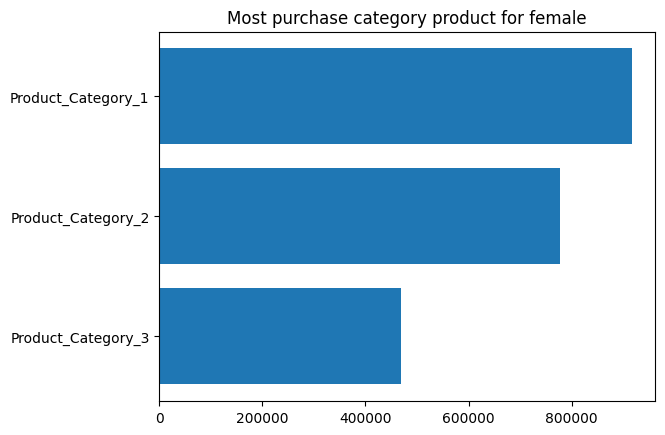

In [11]:
df2 = df.groupby("Gender")[["Product_Category_1","Product_Category_2","Product_Category_3"]].sum().reset_index()
categories = ["Product_Category_1", "Product_Category_2", "Product_Category_3"]
values = sorted([df2.at[0, category] for category in categories], reverse=True)
plt.barh(width=values, y =categories)
plt.gca().invert_yaxis()
plt.title("Most purchase category product for female")

Kategori produk yang banyak dibeli oleh perempuan adalah produk kategori 1 diikuti kategori 2 dan 3

Text(0.5, 1.0, 'Most purchase category product for Male')

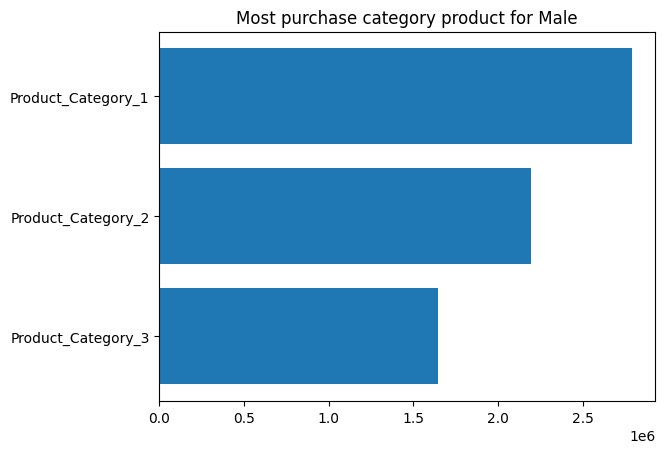

In [44]:
df3 = df.groupby("Gender")[["Product_Category_1","Product_Category_2","Product_Category_3"]].sum().reset_index()
categories = ["Product_Category_1", "Product_Category_2", "Product_Category_3"]
values = sorted([df3.at[1, category] for category in categories], reverse=True)
plt.barh(width=values, y =categories)
plt.gca().invert_yaxis()
plt.title("Most purchase category product for Male")

sama halnya produk yang banyak dibeli oleh laki-laki adalah produk kategori 1 diikuti produk kategori 2 dan 3

Text(0.5, 1.0, 'Distributuion City Category')

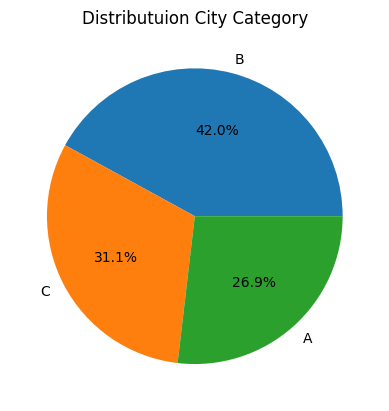

In [51]:
dfpie2 = df["City_Category"].value_counts()
plt.pie(dfpie2, labels =["B", "C", "A"], autopct="%1.1f%%")
plt.title("Distributuion City Category")

Pelanggan didominasi oleh orang yang berdomisili pada kategori kota B sebesar 42.0%, kota kategori c 31.1% dan diikuti oleh kota a

  City_Category  Product_Category_1  Product_Category_2  Product_Category_3
0             A              813387            977988.0            526424.0
1             B             1242828           1549399.0            877512.0
2             C              916501           1177561.0            709393.0


Text(0.5, 1.0, 'Most purchase category in City Category A')

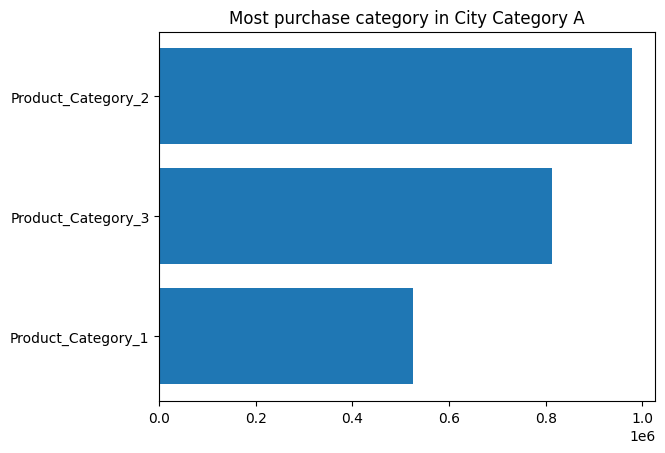

In [12]:
df4 = df.groupby("City_Category")[["Product_Category_1","Product_Category_2","Product_Category_3"]].sum().reset_index()
print(df4)
categories = ["Product_Category_2", "Product_Category_3", "Product_Category_1"]
values = sorted([df4.at[0, category] for category in categories], reverse=True)
plt.barh(width=values, y =categories)
plt.gca().invert_yaxis()
plt.title("Most purchase category in City Category A")

Untuk kategori A ternyata penjualan didominasi oleh produk kategori 2 diikuti oleh produk kategori 3 dan produk kategori 1

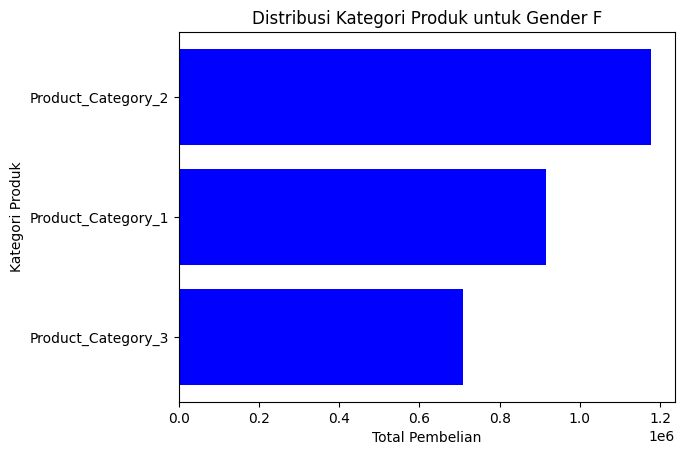

In [20]:

categories = ["Product_Category_1", "Product_Category_2", "Product_Category_3"]
values = [df4.at[2, category] for category in categories]

# Menggabungkan kategori dan nilai, lalu mengurutkannya berdasarkan nilai
sorted_data = sorted(zip(categories, values), key=lambda x: x[1], reverse=True)

sorted_data
sorted_categories, sorted_values = zip(*sorted_data)

# Membuat plot bar horizontal
plt.barh(y=sorted_categories, width=sorted_values)

# Mengubah urutan sumbu Y menjadi terbalik
plt.gca().invert_yaxis()

# Menambahkan label dan judul
plt.xlabel('Total Pembelian')
plt.ylabel('Kategori Produk')
plt.title('Distribusi Kategori Produk untuk Gender F')

# Menampilkan plot
plt.show()

Produk kategori 2 juga masih mendominasi penjualan di kota kategori C, diikuti oleh produk kategori 1 dan produk kategori 3

Data preprocessing

In [105]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Handle Outlier 

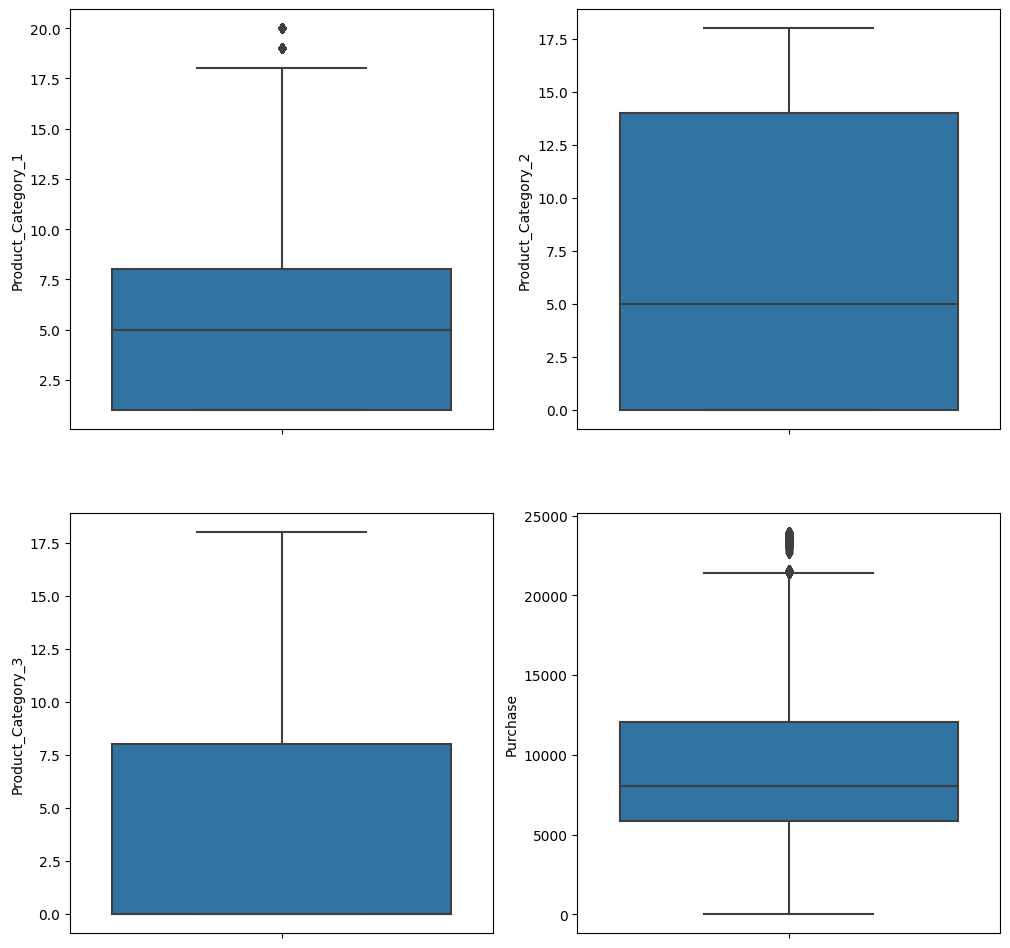

In [107]:
kolomtobox= ['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
plt.figure(figsize=(12,12))
n = 1
for i in kolomtobox :
  
    plt.subplot(2,2,n)
    sns.boxplot(data=df, y=i)
    n+=1

Pada produk kategori 1 dan purchase diatas masih memiliki outlier, sehingga untuk mendukung pembebelajaran mesin, outlier akan diturunkan oleh interquatile atas 

<AxesSubplot: >

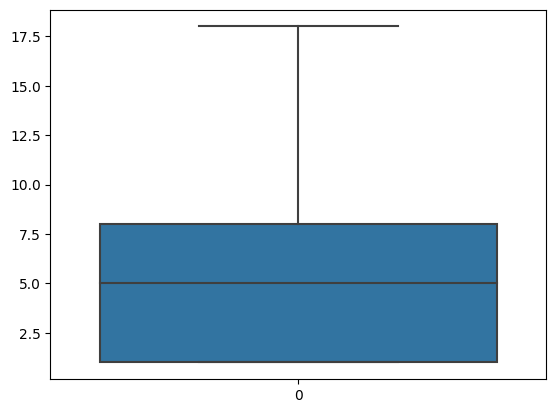

In [108]:
#handle outlier
Q1 = df['Product_Category_1'].quantile(0.25)
Q3 = df['Product_Category_1'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df['Product_Category_1'] < Q1 - 1.5 * IQR) | (df['Product_Category_1'] > Q3 + 1.5 * IQR)

# Hitung nilai median
median_value = df['Product_Category_1'].median()

# Gantikan outlier dengan nilai median
df.loc[outlier_mask, 'Product_Category_1'] = median_value
sns.boxplot(data=df["Product_Category_1"])

        User_ID Product_ID Gender    Age  Occupation City_Category  \
343     1000058  P00117642      M  26-35           2             B   
375     1000062  P00119342      F  36-45           3             A   
652     1000126  P00087042      M  18-25           9             B   
736     1000139  P00159542      F  26-35          20             C   
1041    1000175  P00052842      F  26-35           2             B   
...         ...        ...    ...    ...         ...           ...   
544488  1005815  P00116142      M  26-35          20             B   
544704  1005847  P00085342      F  18-25           4             B   
544743  1005852  P00202242      F  26-35           1             A   
545663  1006002  P00116142      M  51-55           0             C   
545787  1006018  P00052842      M  36-45           1             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
343                             3               0                  10   
375          

<AxesSubplot: >

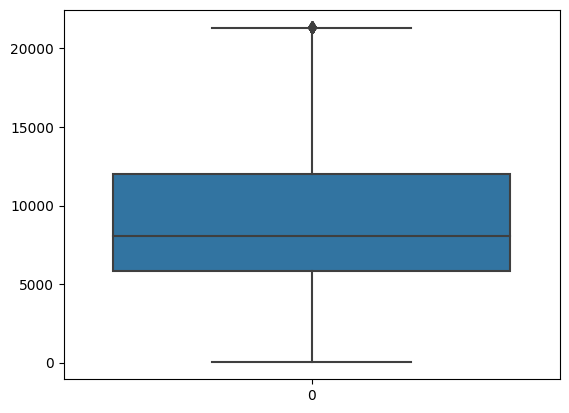

In [109]:
Q11 = df['Purchase'].quantile(0.25)
Q33 = df['Purchase'].quantile(0.75)
IQR = Q33 - Q11

outlier_mask = (df['Purchase'] < Q11 - 1.5 * IQR) | (df['Purchase'] > Q33 + 1.5 * IQR)
outlier = df[(df['Purchase'] < Q11 - 1.5 * IQR) | (df['Purchase'] > Q33 + 1.5 * IQR)]
# Hitung nilai median
median_value = df['Purchase'].median()

# Gantikan outlier dengan nilai median
df.loc[outlier_mask, 'Purchase'] = median_value
print(outlier)
sns.boxplot(data=df["Purchase"])


Encoding 

In [110]:
#label encoding
cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cols:
    df[i]=le.fit_transform(df[i])
    
print(df.dtypes)
df.head()

User_ID                         int64
Product_ID                     object
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,0.0,0.0,7969


In [111]:
#casting to integer to support standard scaller
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

coltoint = ["Age", "Gender", "Stay_In_Current_City_Years"]

for i in coltoint :
    df[i] = df[i].astype(int)

df['City_Category']=df['City_Category'].astype('category')
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                           int32
Age                              int32
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years       int32
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

In [112]:
dfscale = df.copy()
dfscale

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,5,0.0,0.0,368
550064,1006035,P00375436,0,2,1,2,3,0,5,0.0,0.0,371
550065,1006036,P00375436,0,2,15,1,4,1,5,0.0,0.0,137
550066,1006038,P00375436,0,6,1,2,2,0,5,0.0,0.0,365


Normalisasi data menggunakan Standar scaller

In [113]:

ss = StandardScaler()
kolom_scaling = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

scaled_data = ss.fit_transform(dfscale[kolom_scaling])


dfscale[kolom_scaling] = scaled_data
dfscale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,-0.614034,-1.083654,-0.614641,8370
1,1000001,P00248942,0,0,10,0,2,0,-1.149388,-0.118323,1.625106,15200
2,1000001,P00087842,0,0,10,0,2,0,1.795060,-1.083654,-0.614641,1422
3,1000001,P00085442,0,0,10,0,2,0,1.795060,1.168785,-0.614641,1057
4,1000002,P00285442,1,6,16,2,4,0,0.724352,-1.083654,-0.614641,7969


C:\Users\X1\AppData\Local\Temp\ipykernel_10740\1069465148.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfscale["Purchase"], shade=True, color="blue", label="KDE")


<AxesSubplot: xlabel='Purchase', ylabel='Density'>

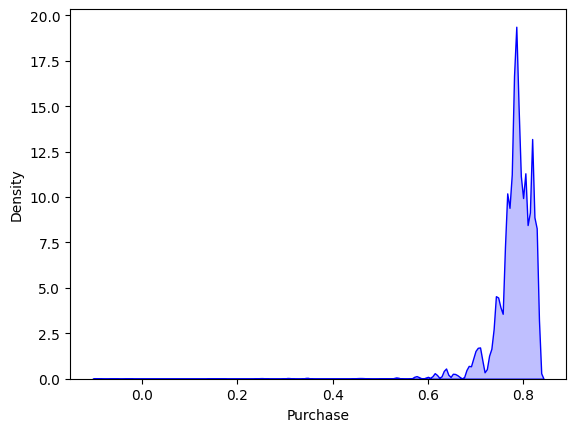

In [119]:
# distribusi data
sns.kdeplot(dfscale["Purchase"], shade=True, color="blue", label="KDE")


In [117]:
# transformasi dengan log untuk menormalkan data purchase 
dfscale['Purchase']=np.log(dfscale['Purchase'])
dfscale = pd.get_dummies(dfscale, columns=["City_Category"])
dfscale.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,P00069042,0,0,10,2,0,-0.614034,-1.083654,-0.614641,0.788830,1,0,0
1,1000001,P00248942,0,0,10,2,0,-1.149388,-0.118323,1.625106,0.817480,1,0,0
2,1000001,P00087842,0,0,10,2,0,1.795060,-1.083654,-0.614641,0.684286,1,0,0
3,1000001,P00085442,0,0,10,2,0,1.795060,1.168785,-0.614641,0.663017,1,0,0
4,1000002,P00285442,1,6,16,4,0,0.724352,-1.083654,-0.614641,0.786350,0,0,1


C:\Users\X1\AppData\Local\Temp\ipykernel_10740\1858471917.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfscale["Purchase"], shade=True, color="blue", label="KDE")


<AxesSubplot: xlabel='Purchase', ylabel='Density'>

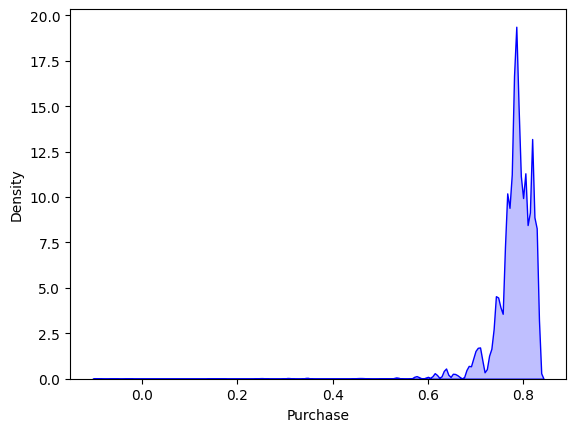

In [118]:
sns.kdeplot(dfscale["Purchase"], shade=True, color="blue", label="KDE")

Split the data to target and train data

In [130]:
dfuse= dfscale.copy()
X=dfuse.drop(labels=['Purchase'],axis=1)                         
Y=dfuse['Purchase']
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_0,City_Category_1,City_Category_2
0,1000001,P00069042,0,0,10,2,0,-0.614034,-1.083654,-0.614641,1,0,0
1,1000001,P00248942,0,0,10,2,0,-1.149388,-0.118323,1.625106,1,0,0
2,1000001,P00087842,0,0,10,2,0,1.795060,-1.083654,-0.614641,1,0,0
3,1000001,P00085442,0,0,10,2,0,1.795060,1.168785,-0.614641,1,0,0
4,1000002,P00285442,1,6,16,4,0,0.724352,-1.083654,-0.614641,0,0,1


In [ ]:
X['Product_ID'] = X['Product_ID'].str.replace('P00', '').astype(float)
ss = StandardScaler()
X['Product_ID'] = ss.fit_transform(X['Product_ID'].values.reshape(-1, 1))


In [135]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,-0.614034,-1.083654,-0.614641,1,0,0
1,1000001,0.722139,0,0,10,2,0,-1.149388,-0.118323,1.625106,1,0,0
2,1000001,-0.845799,0,0,10,2,0,1.795060,-1.083654,-0.614641,1,0,0
3,1000001,-0.869157,0,0,10,2,0,1.795060,1.168785,-0.614641,1,0,0
4,1000002,1.077382,1,6,16,4,0,0.724352,-1.083654,-0.614641,0,0,1


In [136]:
#split data to train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


ML model

In [137]:
linreg = LinearRegression()
Dectreg = DecisionTreeRegressor(max_depth=7)
Ranreg = RandomForestRegressor()

MLA = [linreg, Dectreg, Ranreg]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    start = dt.now()
    model = alg.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'RMSE Train'] = mean_squared_error(y_train, train_pred, squared=False)
    MLA_compare.loc[row_index, 'RMSE Test'] = mean_squared_error(y_test, test_pred, squared=False)
    MLA_compare.loc[row_index, 'Rsquare Train'] = model.score(X_train, y_train)
    MLA_compare.loc[row_index, 'Rsquare Test'] = model.score(X_test, y_test)

    MLA_compare.loc[row_index, 'Time used'] = (dt.now()-start).total_seconds()

    row_index+=1

MLA_compare

,MLA used,RMSE Train,RMSE Test,Rsquare Train,Rsquare Test,Time used
0,LinearRegression,0.047941,0.048357,0.085030,0.084614,0.566108
1,DecisionTreeRegressor,0.021853,0.022134,0.809878,0.808219,1.467851
2,RandomForestRegressor,0.007892,0.021072,0.975202,0.826174,412.803773


Dengan menggunakan supervised learning algoritma Randomforrest menjadi yang terbaik berdasarkan nilai Rsquare pada train dan test data dan memiliki nilai yang rendah pada RMSE baik train atau test 

Load Testing data yang akan digunakan untuk dipredikasi menggunakan model 

Step yang sama dilakukan seperti pada data train 

In [138]:
df_test=pd.read_csv('test.csv')

In [139]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [143]:
df_test["Product_Category_2"].fillna(0, inplace=True)
df_test["Product_Category_3"].fillna(0, inplace=True)

In [144]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [153]:
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df_test['Product_ID'] = ss.fit_transform(df_test['Product_ID'].values.reshape(-1, 1))

In [ ]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df_test[i]=le.fit_transform(df_test[i])

In [ ]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')


coltoint = ["Age", "Gender", "Stay_In_Current_City_Years"]

for i in coltoint :
    df_test[i] = df_test[i].astype(int)

df_test['City_Category']=df_test['City_Category'].astype('category')
df.dtypes

In [151]:
ss = StandardScaler()
kolom_scaling = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

scaled_data = ss.fit_transform(df_test[kolom_scaling])


df_test[kolom_scaling] = scaled_data
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,1,2,1,-1.144571,0.675619,-0.615789
1,1000009,P00113442,1,2,17,2,0,0,-0.609292,-0.289376,-0.615789
2,1000010,P00288442,0,3,1,1,4,1,-0.074014,1.158116,-0.615789
3,1000010,P00145342,0,3,1,1,4,1,-0.341653,0.353954,-0.615789
4,1000011,P00053842,0,2,1,2,1,0,-0.341653,-0.289376,1.302180


In [152]:
df_test = pd.get_dummies(df_test, columns=["City_Category"])


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_0,City_Category_1,City_Category_2
0,1000004,P00128942,1,4,7,2,1,-1.144571,0.675619,-0.615789,0,1,0
1,1000009,P00113442,1,2,17,0,0,-0.609292,-0.289376,-0.615789,0,0,1
2,1000010,P00288442,0,3,1,4,1,-0.074014,1.158116,-0.615789,0,1,0
3,1000010,P00145342,0,3,1,4,1,-0.341653,0.353954,-0.615789,0,1,0
4,1000011,P00053842,0,2,1,1,0,-0.341653,-0.289376,1.302180,0,0,1


In [156]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,-1.144571,0.675619,-0.615789,0,1,0
1,1000009,-0.587188,1,2,17,0,0,-0.609292,-0.289376,-0.615789,0,0,1
2,1000010,1.133865,0,3,1,4,1,-0.074014,1.158116,-0.615789,0,1,0
3,1000010,-0.273465,0,3,1,4,1,-0.341653,0.353954,-0.615789,0,1,0
4,1000011,-1.173330,0,2,1,1,0,-0.341653,-0.289376,1.302180,0,0,1


In [157]:
# Dengan menggunakan model RandomForrestRegressor akan dilakukan prediksi pada test data yang telah dilakukan data preprocessing
Ranreg = RandomForestRegressor()
model = Ranreg.fit(X_train, y_train)
test_pred2 = model.predict(df_test)

In [162]:
test_pred2

array([0.78518341, 0.80186339, 0.76204238, ..., 0.80234964, 0.79044207,
       0.69413114])

didapatkan hasil array untuk prediksi dari data test

Penyimpanan hasil

In [159]:
df_hasil = pd.read_csv("test.csv")

In [160]:
df_hasil= df_hasil[["User_ID","Product_ID"]]
df_hasil.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [161]:
dfhasilsave= pd.DataFrame(test_pred2, columns=["Purchase"])
dfhasilsave["User_ID"]= df_hasil["User_ID"]
dfhasilsave["Product_ID"]= df_hasil["Product_ID"]
dfhasilsave.head()

,Purchase,User_ID,Product_ID
0,0.785183,1000004,P00128942
1,0.801863,1000009,P00113442
2,0.762042,1000010,P00288442
3,0.703201,1000010,P00145342
4,0.721879,1000011,P00053842


In [165]:
dfhasilsave['Purchase'] = np.exp(dfhasilsave['Purchase'])
dfhasilsave.head()

,Purchase,User_ID,Product_ID
0,8.960348,1000004,P00128942
1,9.297001,1000009,P00113442
2,8.521973,1000010,P00288442
3,7.539906,1000010,P00145342
4,7.832626,1000011,P00053842


In [167]:
dfhasilsave.to_csv('predictionsave.csv', index=False)

Hasil disimpan pada csv predictionsave.csv -Terimakasih